In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from scipy import stats

In [2]:
matplotlib.__version__

'3.3.4'

# Import Prepared Immo Data

In [3]:
path = r'C:\Users\s.wienecke\Documents\Fortbildung\Letztes Modul'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immo_data_clean.csv'), index_col = False)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head (10)

,Unnamed: 0,state,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,typeOfFlat,postcode,noRooms,floor,noRoomsRange,garden,livingSpaceRange,city/county,city district,date
0,0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.00000,96107057,oil,False,True,2.000000,595.00,86.00,False,4,ground_floor,44269,4.0,1.000000,4,True,4,Dortmund,Schüren,May19
1,1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.00000,111378734,gas,False,False,1.000000,800.00,89.00,False,5,ground_floor,67459,3.0,2.122405,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19
2,2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.00000,113147523,NaN,False,True,9.000000,965.00,83.80,True,6,apartment,1097,3.0,3.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Oct19
3,3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.00000,108890903,district_heating,False,False,2.000000,343.00,58.15,False,2,other,9599,3.0,3.000000,3,False,2,Mittelsachsen_Kreis,Freiberg,May19
4,4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.804928,903.000000,1950.00000,114751222,gas,False,False,1.000000,765.00,84.97,False,5,apartment,28213,3.0,1.000000,3,False,4,Bremen,Neu_Schwachhausen,Feb20
5,5,Schleswig_Holstein,142.00,gas_heating,NONE,False,True,5,4.48,2.400000,901.331522,1999.00000,115531145,gas,True,False,5.000000,315.20,53.43,False,2,apartment,24891,2.0,2.122405,2,False,2,Schleswig_Flensburg_Kreis,Struxdorf,Feb20
6,6,Sachsen,70.00,self_contained_central_heating,ONE_YEAR_FREE,False,False,9,1.01,2.400000,380.000000,1966.40059,114391930,NaN,False,True,3.714544,310.00,62.00,False,2,NaN,9599,2.0,1.000000,2,True,3,Mittelsachsen_Kreis,Freiberg,Feb20
7,7,Bremen,88.00,central_heating,ONE_YEAR_FREE,False,True,5,1.89,2.400000,584.250000,1959.00000,115270775,gas:electricity,False,True,2.000000,452.25,60.30,False,3,ground_floor,28717,3.0,2.122405,3,False,2,Bremen,St._Magnus,Feb20
8,8,Baden_Württemberg,110.00,oil_heating,ONE_YEAR_FREE,False,False,5,3.77,40.000000,690.000000,1970.00000,106416361,oil,True,True,2.000000,580.00,53.00,False,4,roof_storey,79211,2.0,2.000000,2,False,2,Emmendingen_Kreis,Denzlingen,Feb20
9,9,Nordrhein_Westfalen,95.00,self_contained_central_heating,ONE_YEAR_FREE,False,False,7,1.92,40.000000,901.331522,1953.00000,91383597,gas,False,True,2.000000,300.00,60.00,False,1,apartment,45888,2.5,2.000000,2,False,2,Gelsenkirchen,Bulmke_Hüllen,Oct19


In [7]:
df.shape

(268850, 31)

# Exploring Relationships

## Correlation Heatmap

In [8]:
df.columns

Index(['Unnamed: 0', 'state', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'livingSpace', 'lift', 'baseRentRange', 'typeOfFlat',
       'postcode', 'noRooms', 'floor', 'noRoomsRange', 'garden',
       'livingSpaceRange', 'city/county', 'city district', 'date'],
      dtype='object')

In [9]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['serviceCharge',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'hasKitchen', 'cellar',
       'baseRent', 'livingSpace', 'lift', 'noRooms', 'floor', 'garden',
 ]]

In [10]:
sub

,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,lift,noRooms,floor,garden
0,245.00,False,False,6,4.62,10.000000,840.000000,1965.0,False,True,595.0,86.00,False,4.0,1.000000,True
1,134.00,False,True,8,3.47,10.000000,901.331522,1871.0,False,False,800.0,89.00,False,3.0,2.122405,False
2,255.00,True,True,8,2.72,2.400000,1300.000000,2019.0,False,True,965.0,83.80,True,3.0,3.000000,False
3,58.15,False,True,9,1.53,40.000000,901.331522,1964.0,False,False,343.0,58.15,False,3.0,3.000000,False
4,138.00,False,True,19,2.46,28.804928,903.000000,1950.0,False,False,765.0,84.97,False,3.0,1.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,90.00,False,True,0,2.74,10.000000,910.000000,2016.0,False,True,820.0,90.00,False,3.0,2.122405,False
268846,220.00,False,True,12,6.49,28.804928,1150.000000,1983.0,True,False,930.0,115.00,False,3.5,1.000000,False
268847,220.00,False,True,21,2.90,40.000000,930.000000,1965.0,False,True,650.0,95.00,False,4.0,1.000000,True
268848,175.00,True,True,16,4.39,28.804928,1015.000000,2019.0,False,True,840.0,70.00,True,2.0,2.122405,False


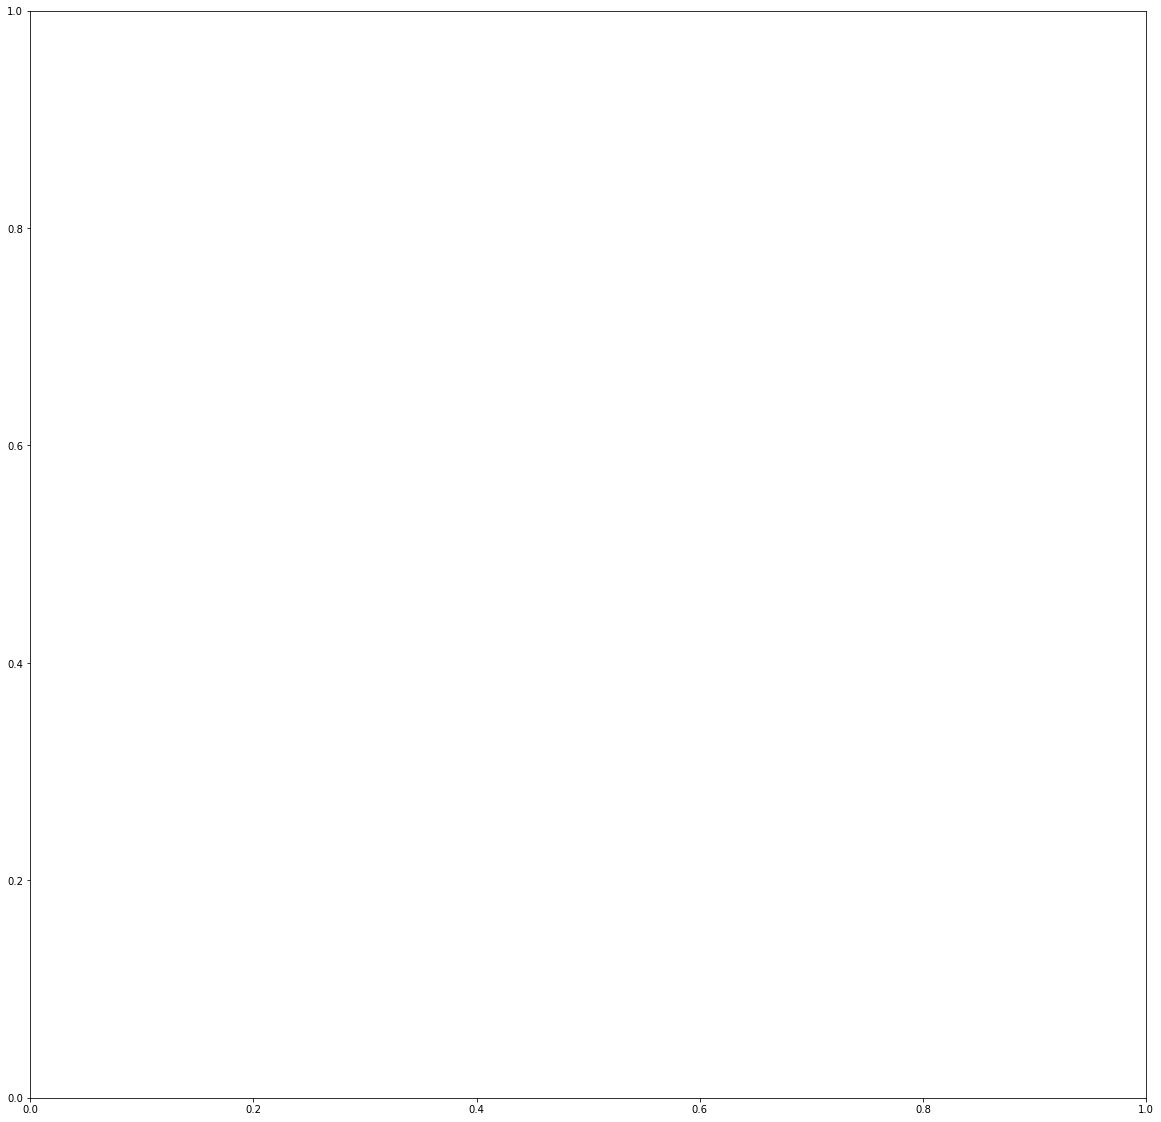

In [11]:
# Create a subplot with matplotlib.
f,ax = plt.subplots(figsize=(20,20))

In [12]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

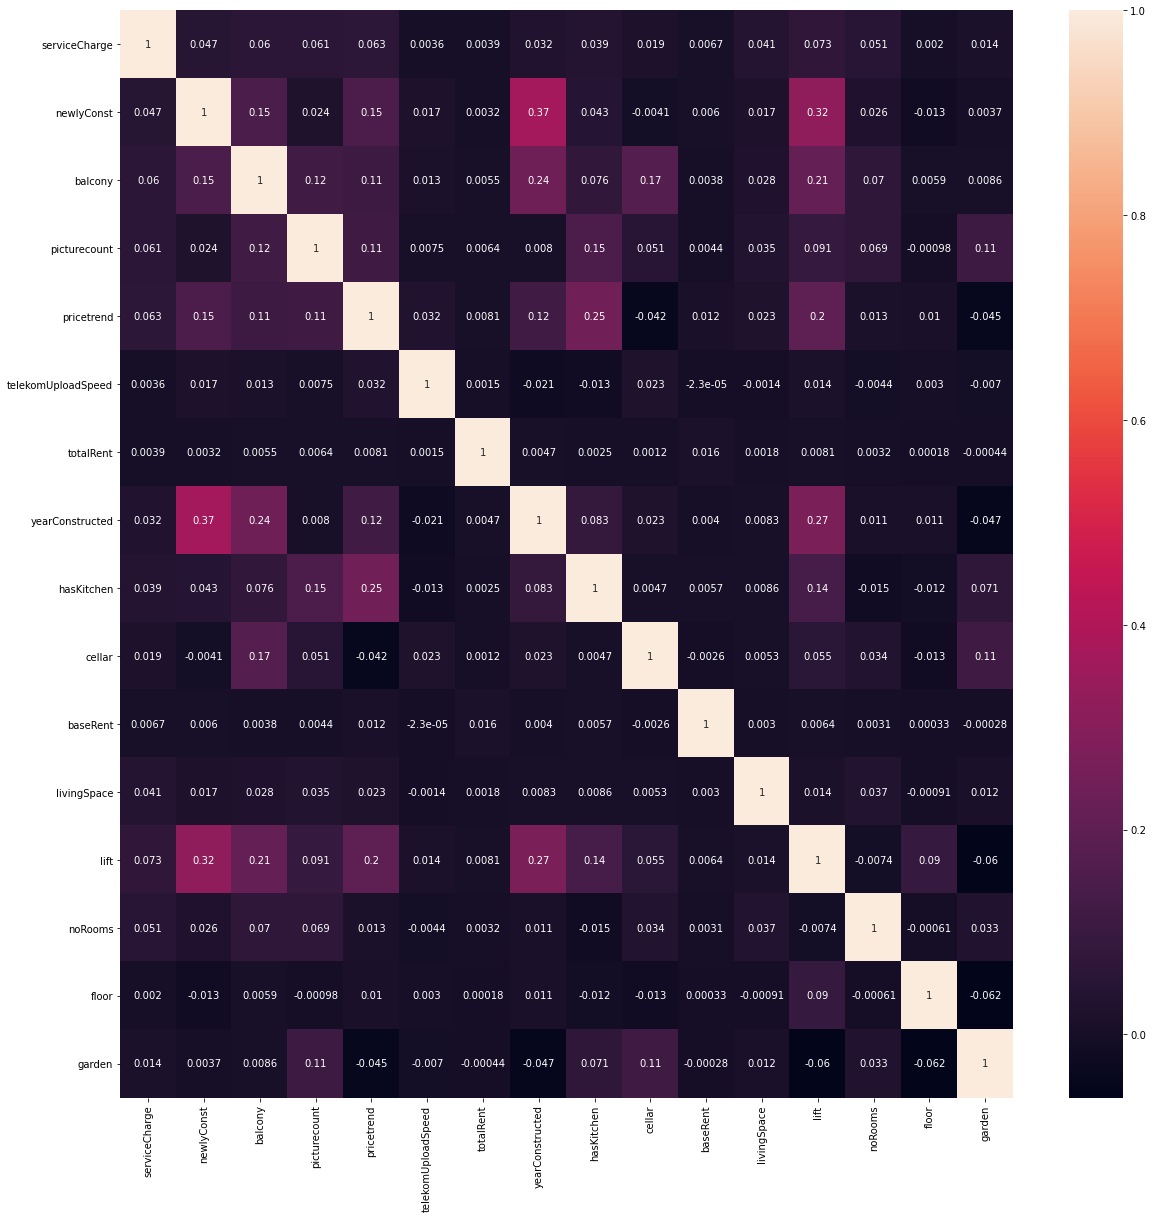

In [13]:
corr.figure

BaseRent - What factors have the most impact on the base rent of a flat?

noRooms: 0,0031  The coefficient indicates a very weak positive correlation. This could be interpreted as “the more rooms a flat has, the higher the base rent,” and vice versa—”the less rooms in a flat, the lower the price.”

livingSpace: 0.003 The coefficient indicates a very weak positive correlation. This could be interpreted as “the more living space a flat has, the higher the base rent,” and vice versa—”the less living space in a flat, the lower the base rent.”

yearConstructed: 0,004 The coefficient indicates a very weak positive correlation. This could be interpreted as “the newer a flat, the higher the base rent,” and vice versa—”the older a flat, the lower the base rent.”

serviceCharge: 0,0067 The coefficient indicates a very weak positive correlation. This could be interpreted as “the higher the service charge, the higher the base rent,” and vice versa—”the lower the service charge, the lower the base rent.”

telekomUploadSpeed: -0,000023 The coefficient indicates a very, very weak negative correlation. This could be interpreted as “the higher the telekom upload speed, the lower the base rent,” and vice versa—”the lower the telekom upload speed, the higher the base rent.”

## Scatterplots

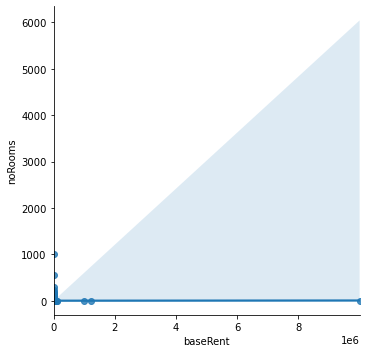

In [14]:
# Create scatterplots in seaborn
sns.lmplot(x = 'baseRent', y =  'noRooms', data = df)

In [15]:
df['baseRent'].max()

9999999.0

Because the axis looks very unusual with BaseRent, I will take a closer look at the outliers.

<AxesSubplot:xlabel='baseRent', ylabel='baseRent'>

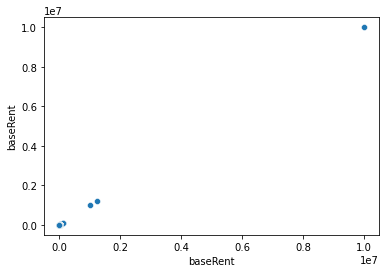

In [16]:
sns.scatterplot(x = 'baseRent', y = 'baseRent',data = df)

In [17]:
df.loc[df['baseRent'] > 100000]

,Unnamed: 0,state,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,typeOfFlat,postcode,noRooms,floor,noRoomsRange,garden,livingSpaceRange,city/county,city district,date
8406,8406,Baden_Württemberg,151.206113,NaN,ONE_YEAR_FREE,False,True,13,3.90,5.000000,1.234567e+06,1966.40059,107360251,NaN,True,False,3.714544,1234567.0,76.00,False,9,apartment,68789,4.0,2.122405,4,False,3,Rhein_Neckar_Kreis,Sankt_Leon_Rot,Sep18
16731,16731,Sachsen,151.206113,central_heating,ONE_YEAR_FREE,False,True,1,4.07,40.000000,9.013315e+02,1966.40059,115233180,NaN,False,True,3.714544,120000.0,65.72,False,9,raised_ground_floor,4157,3.0,2.122405,3,False,3,Leipzig,Gohlis_Mitte,Feb20
243713,243713,Nordrhein_Westfalen,25000.000000,floor_heating,ONE_YEAR_FREE,False,True,12,3.61,40.000000,9.013315e+02,1984.00000,111426318,electricity,False,True,4.000000,120000.0,14000.00,False,9,apartment,45133,3.5,1.000000,3,False,7,Essen,Bredeney,May19
260259,260259,Sachsen_Anhalt,151.206113,NaN,NaN,False,False,1,2.22,28.804928,1.000000e+06,1966.40059,91194882,NaN,False,False,3.714544,1000000.0,10.00,False,9,other,39624,1.0,2.122405,1,False,1,Altmarkkreis_Salzwedel,Güssefeld,May19
264934,264934,Saarland,151.206113,NaN,NaN,False,False,0,4.41,28.804928,9.013315e+02,1966.40059,113543854,NaN,False,False,3.714544,9999999.0,1.00,False,9,NaN,66666,1.0,2.122405,1,False,1,Merzig_Wadern_Kreis,Beckingen,Feb20


I will exclude the outliers for a better analysis.

In [18]:
df.loc[df['baseRent'] >100000, 'baseRent'] = np.nan

In [19]:
df['baseRent'].max()

39200.0

After exclusion, I do the heat map correlation again.

## Correlation Heatmap 2

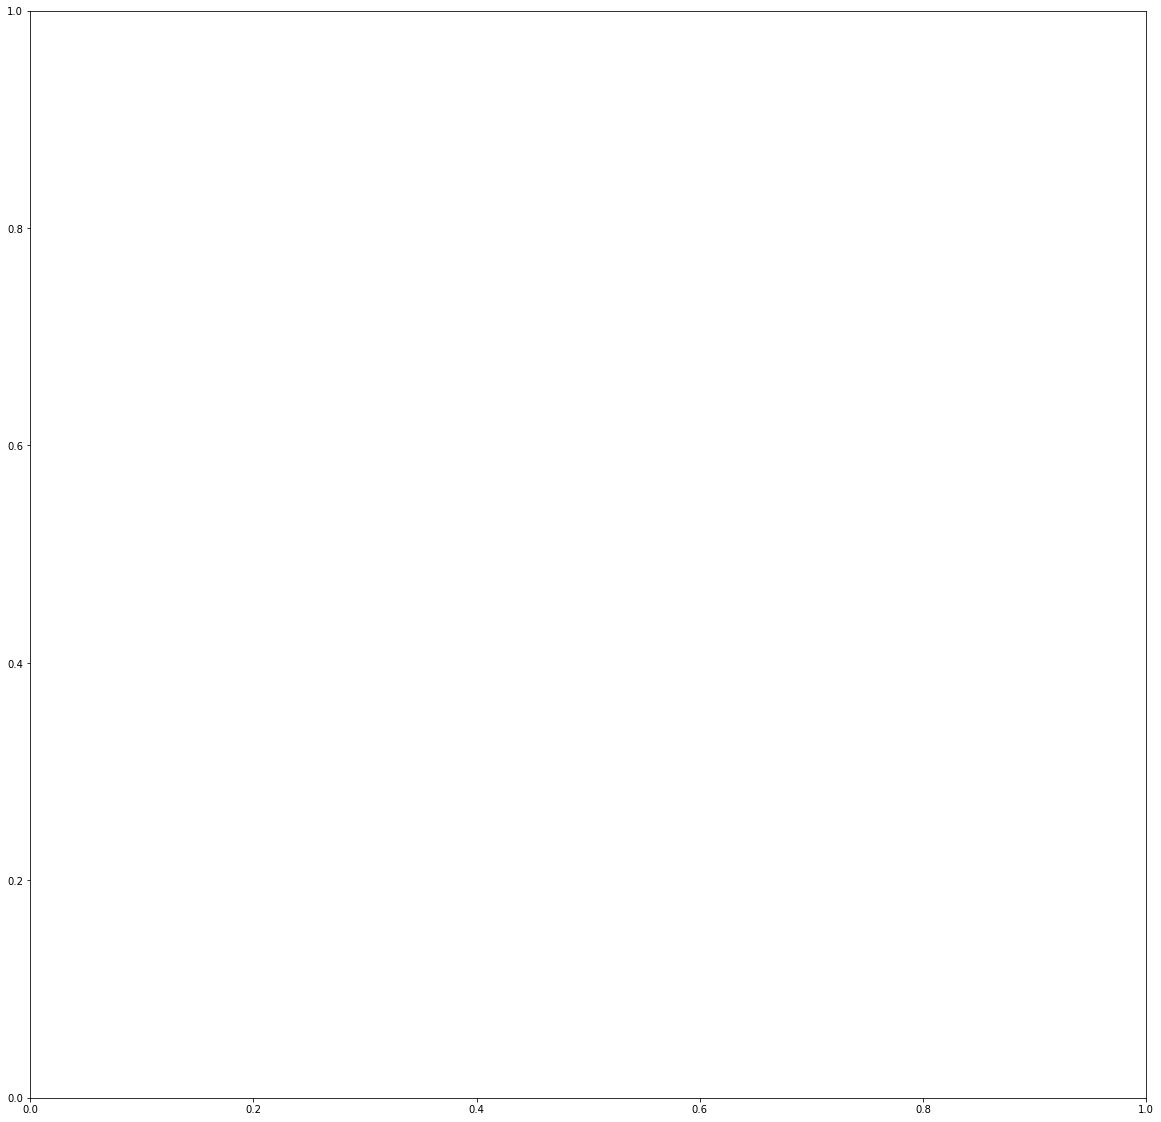

In [20]:
# Create a subplot with matplotlib.
f,ax = plt.subplots(figsize=(20,20))

In [21]:
corr1 = sns.heatmap(sub.corr(), annot = True, ax = ax) 

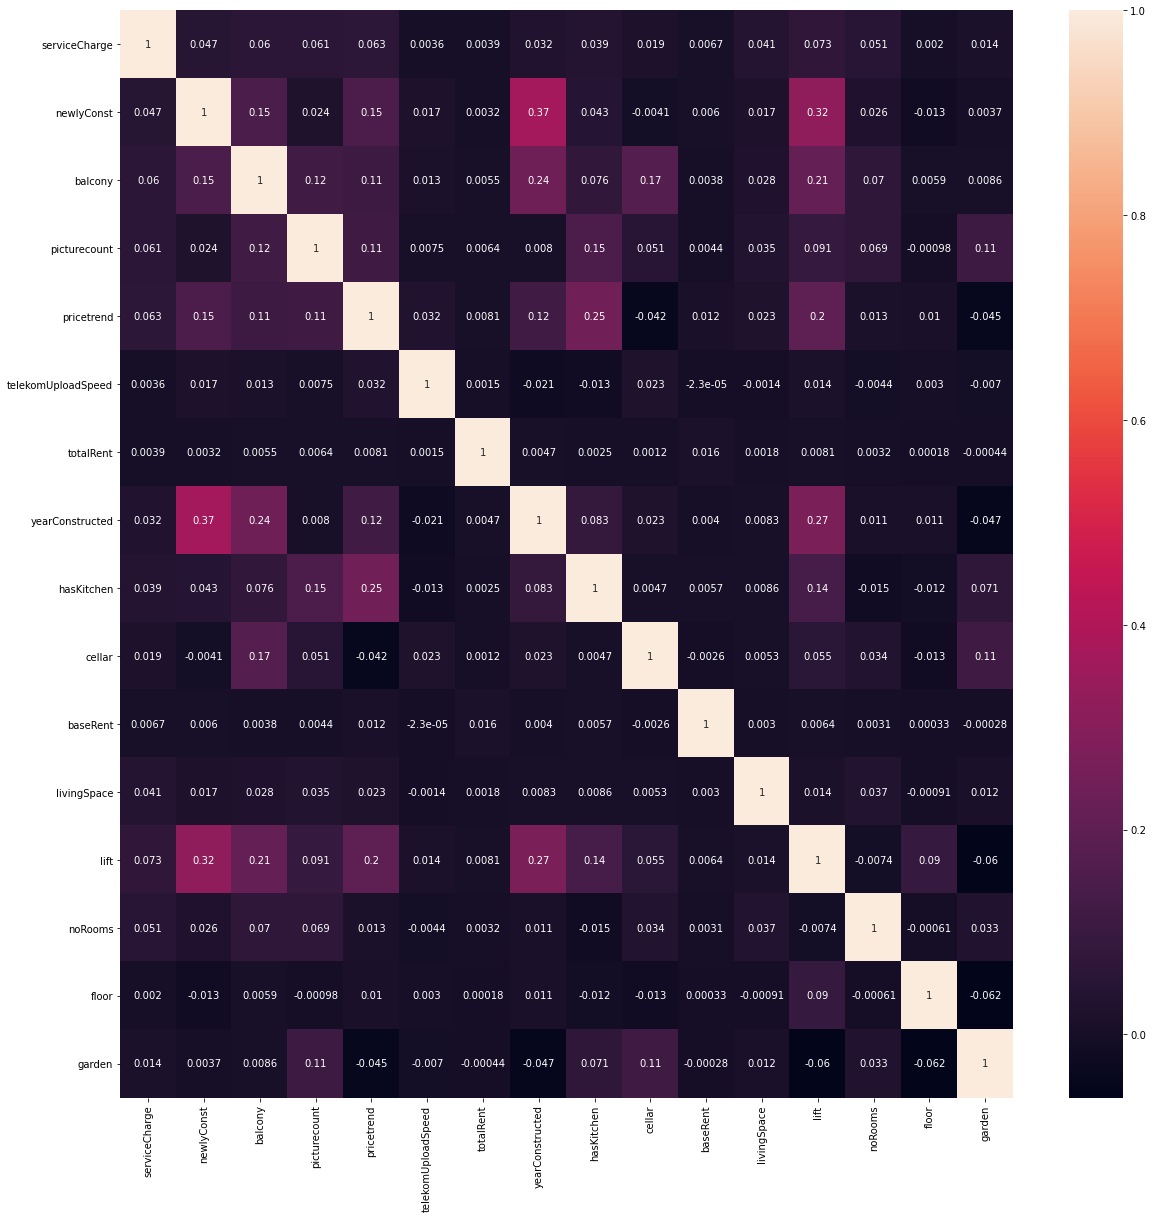

In [22]:
corr1.figure

BaseRent - What factors have the most impact on the base rent of a flat?

noRooms: 0,16  The coefficient indicates a weak positive correlation. This could be interpreted as “the more rooms a flat has, the higher the base rent,” and vice versa—”the less rooms in a flat, the lower the price.”

livingSpace: 0.089 The coefficient indicates a weak positive correlation. This could be interpreted as “the more living space a flat has, the higher the base rent,” and vice versa—”the less living space in a flat, the lower the base rent.”

yearConstructed: 0,15 The coefficient indicates a weak positive correlation. This could be interpreted as “the newer a flat, the higher the base rent,” and vice versa—”the older a flat, the lower the base rent.”

serviceCharge: 0,19 The coefficient indicates a weak positive correlation. This could be interpreted as “the higher the service charge, the higher the base rent,” and vice versa—”the lower the service charge, the lower the base rent.”

telekomUploadSpeed: 0,012 The coefficient indicates a very weak positive correlation. This could be interpreted as “the higher the telekom upload speed, the higher the base rent,” and vice versa—”the lower the telekom upload speed, the lower the base rent.”

## Scatterplots 2

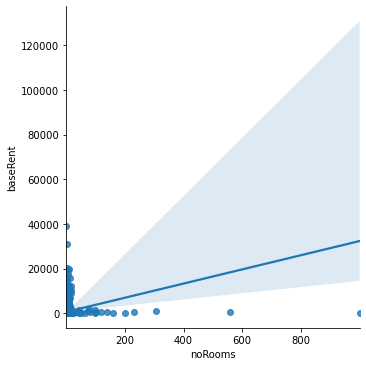

In [23]:
# Create scatterplots in seaborn
sns.lmplot(x = 'noRooms', y =  'baseRent', data = df)

The trend line is a bit steep, so there es a small upward trend. There are many points far away from this line, and in additon we see some outliers for noRomms (ober 500).

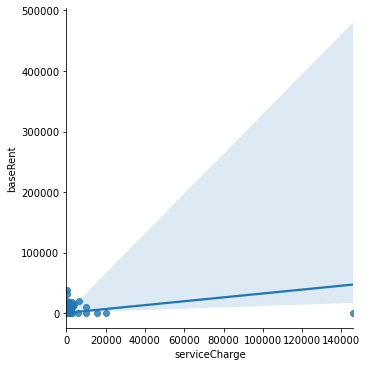

In [24]:
sns.lmplot(x = 'serviceCharge', y = 'baseRent' , data = df)

The trend line is just a bit steep, so there es a very small upward trend. Some points are not close to the line, and in additon we see one outlier for serviceCharge (over 40.000).

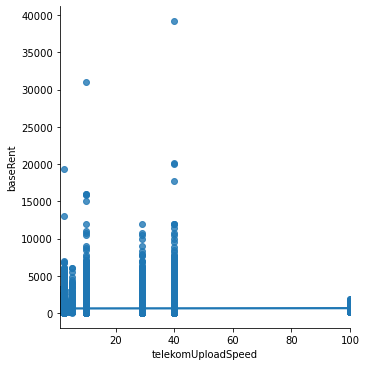

In [25]:
sns.lmplot(x = 'telekomUploadSpeed', y = 'baseRent' , data = df)

The trend line isn't steep, so there es a no upward/downward trend. There are a lot points not close to the line, and it's noticeable that some points are arranged vertically, depending on the Telekom upload speed.

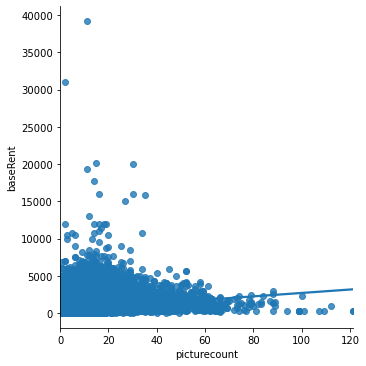

In [26]:
sns.lmplot(x = 'picturecount', y = 'baseRent' , data = df)

The trend line is a bit steep, so there es a very small upward trend. There are many points not close to the line, and in additon we see one outlier for picturecount (over 100). We see that the most flat offers have less than 20 pictures.

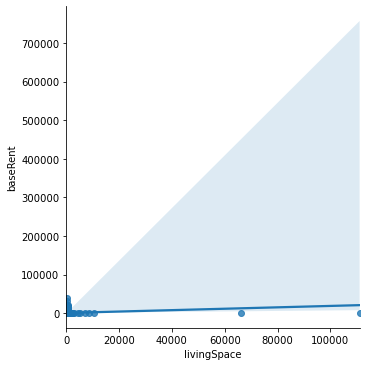

In [27]:
sns.lmplot(x = 'livingSpace', y = 'baseRent' , data = df)

The trendline only lifts slightly upwards, so there es a very small upward trend. There are only a bit points not close to the line, and in additon we see two outlier for livingSpace (over 20.000).

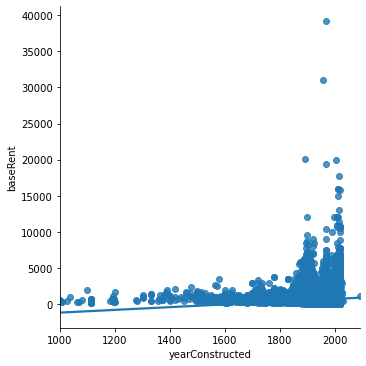

In [28]:
sns.lmplot(x = 'yearConstructed', y = 'baseRent' , data = df)

The trend line is a bit steep, so there es a small upward trend. There are manyt points not close to the line (especially the newer the building is).

## Pair Plots

In [29]:
# Create a second subset without categorical variables
sub2 = df[['serviceCharge','picturecount',
       'telekomUploadSpeed','yearConstructed',
       'baseRent', 'livingSpace', 'noRooms']]

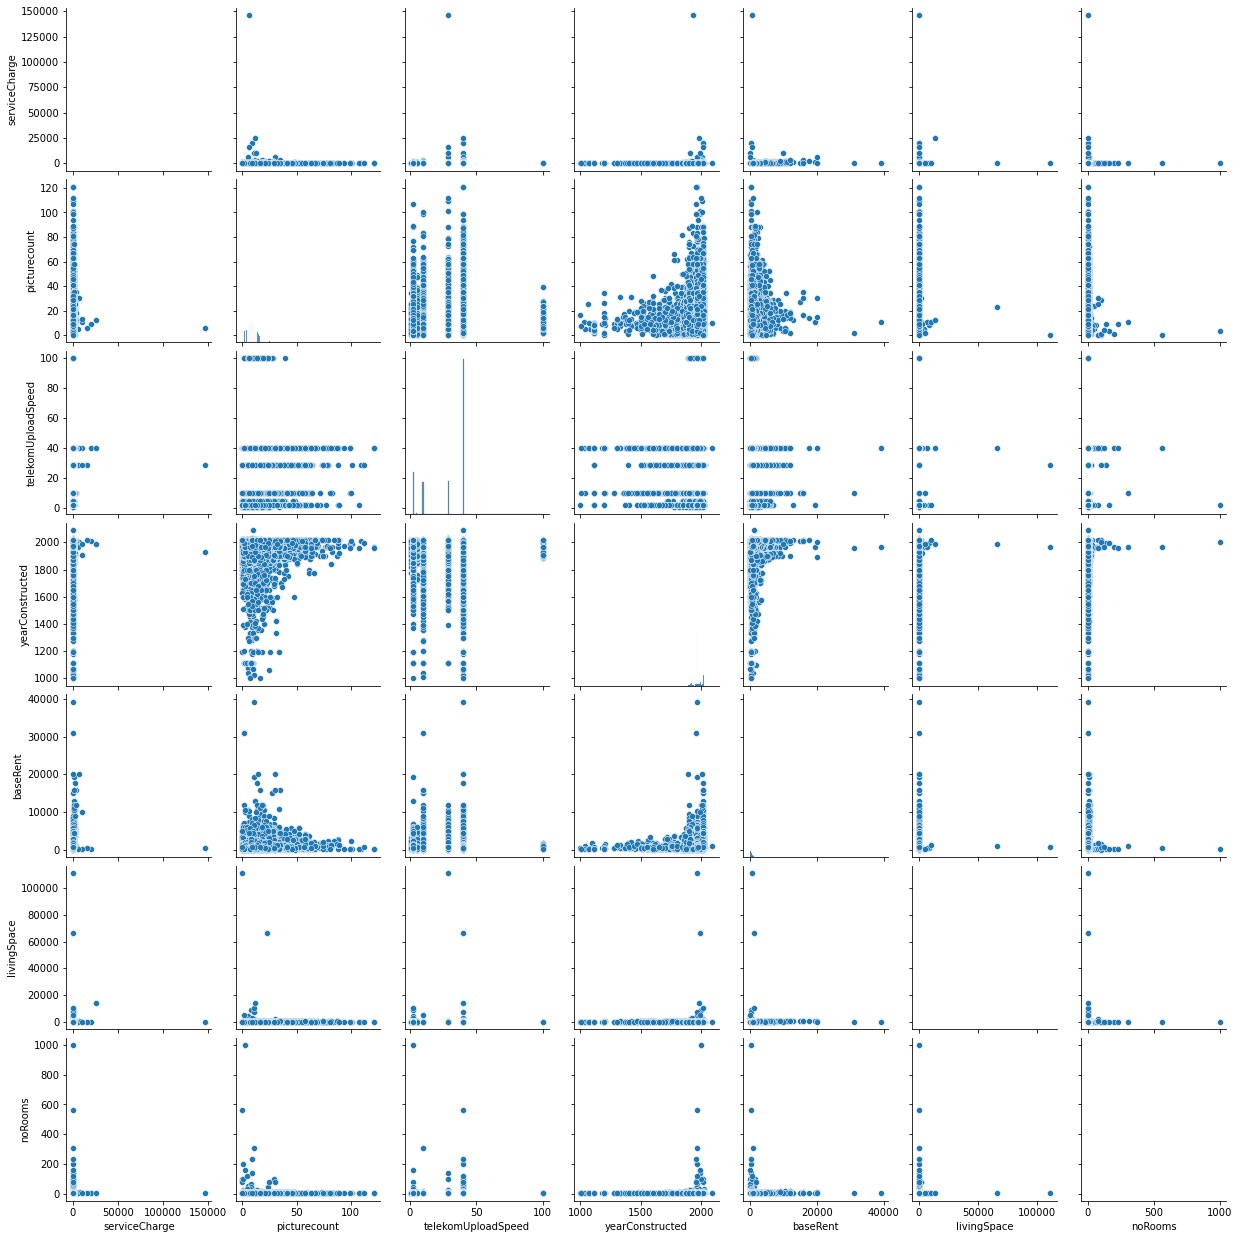

In [30]:
# Create a pair plot 

g = sns.pairplot(sub2)

In most plots you see the points in a vertical or horizontal line. I want to investigate the variables yearconstructed, picturecount and baseRent further because they show an upward or downward trend in the plot.

## Categorical Plots

C:\Users\s.wienecke\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='picturecount', ylabel='Density'>

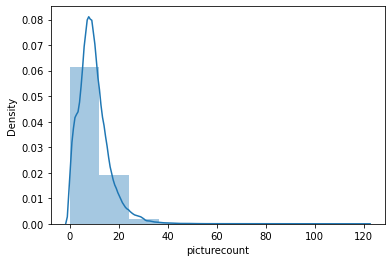

In [31]:
# Use a histogram to visualize the distribution 
sns.distplot(df['picturecount'], bins = 10)

In [32]:
df.loc[df['picturecount'] < 10, 'Picture category'] = 'Least pictures '
df.loc[(df['picturecount'] >= 10) & (df['picturecount'] < 20), 'Picture category'] = 'Few pictures'
df.loc[(df['picturecount'] >= 20) & (df['picturecount'] < 50), 'Picture category'] = 'A lot of pictures'
df.loc[df['picturecount'] >= 50, 'Picture category'] = 'Very many pictures'

In [33]:
df['Picture category'].value_counts(dropna = False)

Least pictures        148230
Few pictures          102064
A lot of pictures      18276
Very many pictures       280
Name: Picture category, dtype: int64

In [34]:
df.columns

Index(['Unnamed: 0', 'state', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'livingSpace', 'lift', 'baseRentRange', 'typeOfFlat',
       'postcode', 'noRooms', 'floor', 'noRoomsRange', 'garden',
       'livingSpaceRange', 'city/county', 'city district', 'date',
       'Picture category'],
      dtype='object')

In [35]:
# export df2 to folder Prepared Data
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'immo_data_clean_6.2.csv'))

In [ ]:
# Create a categorical plot in seaborn
sns.set(style="ticks")
g = sns.catplot(x="baseRent", y="picturecount", hue="Picture category", data=df)

# Revision of questions

Clarifying questions:

- Which city have most expensive flats? - This cannot be answered so far.
- Where can people live most cheaply? Where are the 10 affordable flats?  - This cannot be answered so far.
- Which characteristics do expensive and cheap flat have? 

cheap flats: 

- built earlier
- lower service charge
- fewer rooms


expensive flats: 
- more recent construction date
- higher service charge
- more rooms

- Where are the most and the fewest flats offer? - This cannot be answered so far.

Funneling questions:

- Are flats with almost the same characteristics in the same price level? - This cannot be answered so far.
- Does the city district have an influence on the price? - This cannot be answered so far.
- Does the year of construction have an influence on the price? - yes, there seems to be a small upward trend/influnce. 
- Are bigger flats more expensive than smaller flats? - at the moment not really sure because there is only a very small upward trend.
- Do the number of flat offers in a region/city have an influence on the price?  - This cannot be answered so far.

#  Add new questions

Why does the size of the flat seem to have only a small influence on the price? What caused the outlier (in general)? 

# Define any hypotheses

If the flat has fewer rooms, then the base rent will be higher.

If the service charge is lower, the base rent will be lower.

If the flat was built more recent, then the base rent will be higher.